In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
pd.__version__

'1.0.1'

In [3]:
outpatient = '..\data\MUP_OHP_R19_P04_V10_D17_APC_Provider.xlsx'

In [4]:
hospital_OP = pd.read_excel(outpatient, usecols="A:N", header=5)

In [5]:
#assign columns name based on numbers of columns
hospital_OP.columns = ['Provider_ID', 'Provider_Name', 'Provider_Street', 'Provider_City', 'Provider_State', 'Provider_Zip', 
              'Provider_Hospital_Referral_Region','APC', 'APC_Description','Beneficiaries','Comprehensive_APC_Services',
              'Avg_Est_Total_submitted_amt','Avg_Medicare_Allowed','Avg_Medicare_pymt']

In [6]:
#change data type
hospital_OP=hospital_OP.astype({'Provider_ID':'str','Provider_Zip':'str', 'APC':'str'})

In [7]:
hospital_OP.info(0)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61779 entries, 0 to 61778
Data columns (total 14 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Provider_ID                        61779 non-null  object 
 1   Provider_Name                      61779 non-null  object 
 2   Provider_Street                    61779 non-null  object 
 3   Provider_City                      61779 non-null  object 
 4   Provider_State                     61779 non-null  object 
 5   Provider_Zip                       61779 non-null  object 
 6   Provider_Hospital_Referral_Region  61779 non-null  object 
 7   APC                                61779 non-null  object 
 8   APC_Description                    61779 non-null  object 
 9   Beneficiaries                      60782 non-null  float64
 10  Comprehensive_APC_Services         61779 non-null  int64  
 11  Avg_Est_Total_submitted_amt        61779 non-null  flo

In [32]:
hospital_OP_5302 = hospital_OP[hospital_OP.APC == '5302']
hospital_OP_5302.shape

(2261, 14)

In [27]:
CBSA_ZIP_list =['37010', '37011', '37012', '37013', '37014', '37015', '37016',
       '37018', '37020', '37022', '37024', '37025', '37026', '37027',
       '37029', '37030', '37031', '37032', '37035', '37036', '37037',
       '37043', '37046', '37048', '37049', '37051', '37052', '37055',
       '37056', '37057', '37060', '37062', '37063', '37064', '37065',
       '37066', '37067', '37068', '37069', '37070', '37071', '37072',
       '37073', '37074', '37075', '37076', '37077', '37080', '37082',
       '37083', '37085', '37086', '37087', '37088', '37089', '37090',
       '37091', '37095', '37101', '37110', '37115', '37116', '37118',
       '37119', '37121', '37122', '37127', '37128', '37129', '37130',
       '37131', '37132', '37133', '37135', '37138', '37141', '37143',
       '37145', '37146', '37148', '37149', '37150', '37151', '37152',
       '37153', '37160', '37165', '37166', '37167', '37171', '37172',
       '37174', '37179', '37180', '37181', '37184', '37186', '37187',
       '37188', '37189', '37190', '37201', '37202', '37203', '37204',
       '37205', '37206', '37207', '37208', '37209', '37210', '37211',
       '37212', '37213', '37214', '37215', '37216', '37217', '37218',
       '37219', '37220', '37221', '37222', '37224', '37227', '37228',
       '37229', '37232', '37234', '37235', '37236', '37238', '37240',
       '37242', '37243', '37246', '37250', '37357', '38401', '38402',
       '38451', '38454', '38461', '38472', '38474', '38476', '38482',
       '38483', '38487', '38547', '38548', '38552', '38560', '38563',
       '38567', '38569', '38588']

In [34]:
hospital_nashville_5302 = hospital_OP_5302[hospital_OP_5302.Provider_Zip.isin(CBSA_ZIP_list)]

In [35]:
hospital_nashville_5302

,Provider_ID,Provider_Name,Provider_Street,Provider_City,Provider_State,Provider_Zip,Provider_Hospital_Referral_Region,APC,APC_Description,Beneficiaries,Comprehensive_APC_Services,Avg_Est_Total_submitted_amt,Avg_Medicare_Allowed,Avg_Medicare_pymt
49917,440003,Sumner Regional Medical Center,555 Hartsville Pike,Gallatin,TN,37066,TN - Nashville,5302,Level 2 Upper GI Procedures,103.0,114,7458.732632,1223.454825,968.390614
49935,440006,Tristar Skyline Medical Center,3441 Dickerson Pike,Nashville,TN,37207,TN - Nashville,5302,Level 2 Upper GI Procedures,13.0,15,14899.436667,1248.620000,994.840000
50146,440029,Williamson Medical Center,4321 Carothers Parkway,Franklin,TN,37067,TN - Nashville,5302,Level 2 Upper GI Procedures,16.0,18,5393.221111,1248.620000,994.840000
50269,440039,Vanderbilt University Medical Center,1211 Medical Center Drive,Nashville,TN,37232,TN - Nashville,5302,Level 2 Upper GI Procedures,477.0,623,7120.824045,1205.620546,958.820642
50304,440046,Tristar Horizon Medical Center,111 Highway 70 East,Dickson,TN,37055,TN - Nashville,5302,Level 2 Upper GI Procedures,12.0,13,13325.139231,1095.567692,841.787692
50426,440053,Saint Thomas Rutherford Hospital,1700 Medical Center Parkway,Murfreesboro,TN,37129,TN - Nashville,5302,Level 2 Upper GI Procedures,50.0,55,10690.859091,1248.620000,994.840000
50536,440065,Northcrest Medical Center,100 Northcrest Drive,Springfield,TN,37172,TN - Nashville,5302,Level 2 Upper GI Procedures,26.0,29,6493.112069,1248.620000,994.840000
50612,440073,Maury Regional Hospital,1224 Trotwood Ave,Columbia,TN,38401,TN - Nashville,5302,Level 2 Upper GI Procedures,209.0,254,4928.176772,1229.639134,973.600787
50660,440082,Saint Thomas West Hospital,"4220 Harding Rd, Po Box 380",Nashville,TN,37205,TN - Nashville,5302,Level 2 Upper GI Procedures,189.0,207,6350.164010,1224.590048,970.810048
50790,440111,Metro Nashville General Hospital,1818 Albion Street,Nashville,TN,37208,TN - Nashville,5302,Level 2 Upper GI Procedures,11.0,12,4488.787500,1248.620000,994.840000


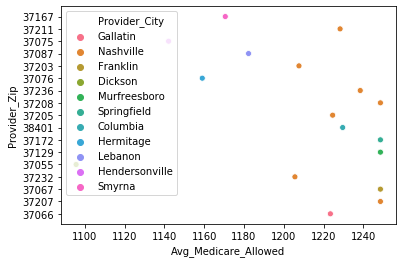

In [42]:
ax = sns.scatterplot(x="Avg_Medicare_Allowed", y="Provider_Zip", hue ="Provider_City", data= hospital_nashville_5302)

In [45]:
hospital_nashville_5302.groupby('Provider_City').Avg_Medicare_Allowed.agg(['max','mean','min'])

,max,mean,min
Provider_City,,,
Columbia,1229.639134,1229.639134,1229.639134
Dickson,1095.567692,1095.567692,1095.567692
Franklin,1248.620000,1248.620000,1248.620000
Gallatin,1223.454825,1223.454825,1223.454825
Hendersonville,1142.076522,1142.076522,1142.076522
Hermitage,1159.030952,1159.030952,1159.030952
Lebanon,1182.297333,1182.297333,1182.297333
Murfreesboro,1248.620000,1248.620000,1248.620000
Nashville,1248.620000,1228.844499,1205.620546


In [59]:
result = hospital_nashville_5302.groupby(['Provider_City','Provider_Name'])
result.first()

,,Provider_ID,Provider_Street,Provider_State,Provider_Zip,Provider_Hospital_Referral_Region,APC,APC_Description,Beneficiaries,Comprehensive_APC_Services,Avg_Est_Total_submitted_amt,Avg_Medicare_Allowed,Avg_Medicare_pymt
Provider_City,Provider_Name,,,,,,,,,,,,
Columbia,Maury Regional Hospital,440073,1224 Trotwood Ave,TN,38401,TN - Nashville,5302,Level 2 Upper GI Procedures,209.0,254,4928.176772,1229.639134,973.600787
Dickson,Tristar Horizon Medical Center,440046,111 Highway 70 East,TN,37055,TN - Nashville,5302,Level 2 Upper GI Procedures,12.0,13,13325.139231,1095.567692,841.787692
Franklin,Williamson Medical Center,440029,4321 Carothers Parkway,TN,37067,TN - Nashville,5302,Level 2 Upper GI Procedures,16.0,18,5393.221111,1248.620000,994.840000
Gallatin,Sumner Regional Medical Center,440003,555 Hartsville Pike,TN,37066,TN - Nashville,5302,Level 2 Upper GI Procedures,103.0,114,7458.732632,1223.454825,968.390614
Hendersonville,Tristar Hendersonville Medical Center,440194,355 New Shackle Island Rd,TN,37075,TN - Nashville,5302,Level 2 Upper GI Procedures,85.0,92,15882.339891,1142.076522,886.705217
Hermitage,Tristar Summit Medical Center,440150,5655 Frist Blvd,TN,37076,TN - Nashville,5302,Level 2 Upper GI Procedures,16.0,21,11958.979524,1159.030952,905.250952
Lebanon,Tennova Healthcare-Lebanon,440193,1411 Baddour Parkway,TN,37087,TN - Nashville,5302,Level 2 Upper GI Procedures,29.0,30,17455.660000,1182.297333,928.517333
Murfreesboro,Saint Thomas Rutherford Hospital,440053,1700 Medical Center Parkway,TN,37129,TN - Nashville,5302,Level 2 Upper GI Procedures,50.0,55,10690.859091,1248.620000,994.840000
Nashville,Metro Nashville General Hospital,440111,1818 Albion Street,TN,37208,TN - Nashville,5302,Level 2 Upper GI Procedures,11.0,12,4488.787500,1248.620000,994.840000
